# Mining quality prediction

In this project, I will train a deep learning model to predict  the percentage of Cilica concentrate in the iron ore concentrate per minute.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from jupyterthemes import jtplot
jtplot.style(theme='chesterish', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  

In [6]:
mining_df = pd.read_csv('C:/Users/Maria/Desktop/Coursera University of Michigan/Mining Quality Prediction/mining_data.csv')


In [7]:
mining_df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3196.680000,542.694333,396.284000,10.158367,1.668070,249.796333,250.275667,248.668000,...,250.547000,464.978667,490.450333,443.465000,442.856333,438.782333,452.248333,466.300667,67.06,1.11
1,55.2,16.98,3213.673333,540.649333,397.949333,10.156600,1.664973,249.536000,250.752000,250.968333,...,249.807000,445.001000,362.894667,442.748333,471.045333,445.239667,443.630667,426.921667,67.06,1.11
2,55.2,16.98,3180.080000,535.929333,397.305000,10.154800,1.661877,249.576000,250.279667,251.001333,...,249.686667,443.574667,478.916333,432.779333,437.401667,441.761000,490.824667,478.046667,67.06,1.11
3,55.2,16.98,3196.713333,535.102000,397.010667,10.153067,1.658780,249.380333,248.799333,250.241333,...,249.926333,440.731333,488.994000,452.461333,439.572667,434.027333,457.083667,458.815667,67.06,1.11
4,55.2,16.98,3111.723333,532.735000,395.263667,10.151300,1.655680,249.426667,252.209667,249.243333,...,249.975667,445.851667,418.860000,462.936667,454.948333,453.571667,446.831667,426.600000,67.06,1.11


In [8]:
mining_df.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [9]:
mining_df['% Silica Concentrate'].describe()

count    245700.000000
mean          2.327228
std           1.125623
min           0.600000
25%           1.440000
50%           2.000000
75%           3.010000
max           5.530000
Name: % Silica Concentrate, dtype: float64

In [10]:
mining_df['% Iron Concentrate'].max()

68.01

# Data Visualisation

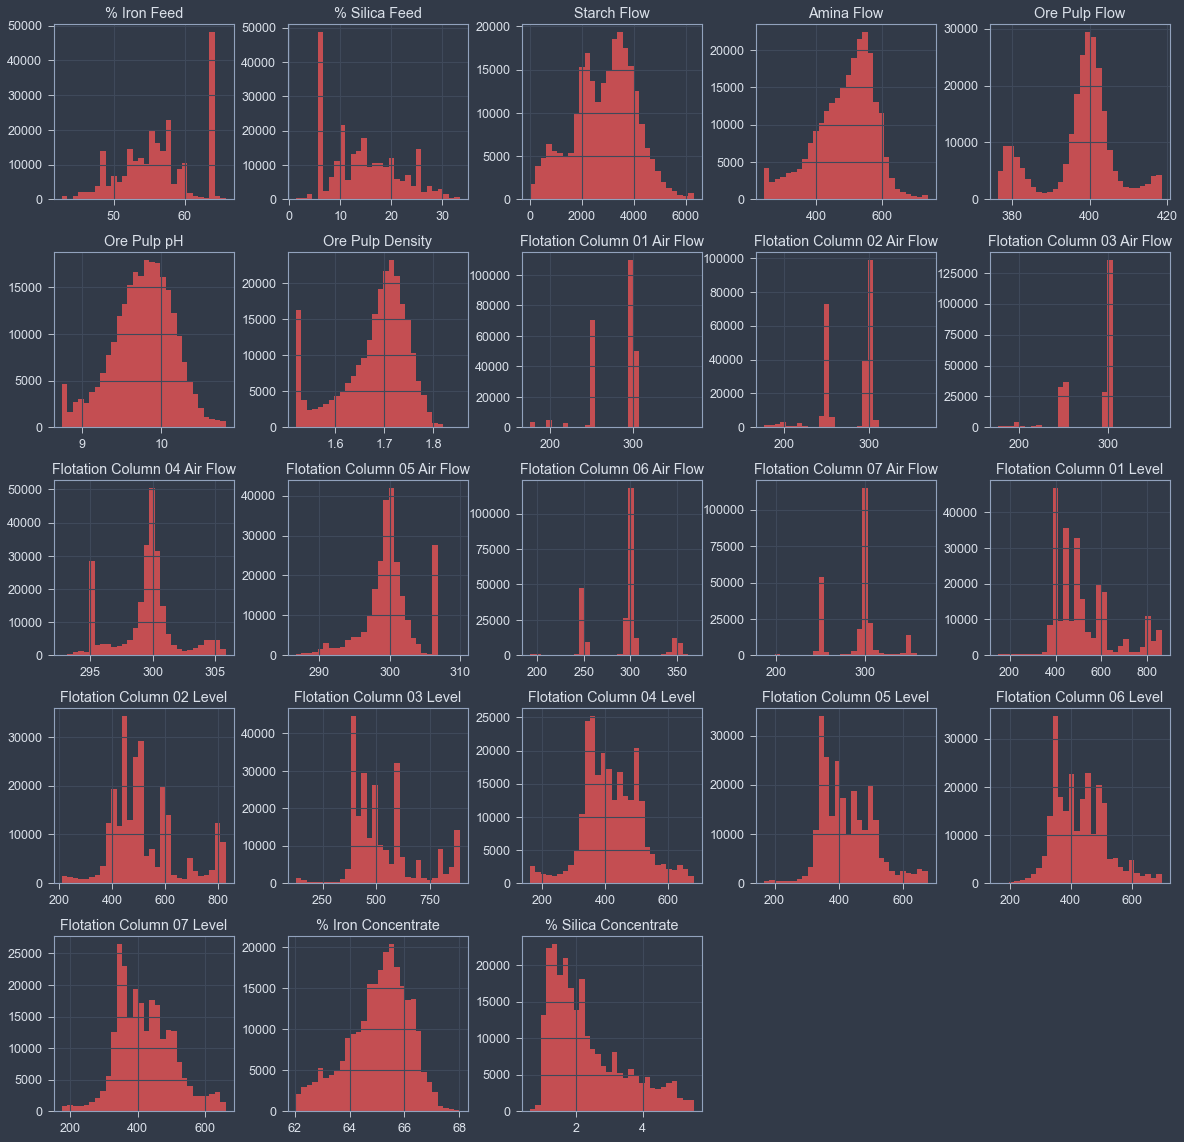

In [46]:
mining_df.hist(bins = 30, figsize = (20,20), color ='r')
plt.show()

In [12]:
# Obtain the correlation matrix
mining_df.corr()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.971837,0.028644,-0.088595,0.164676,0.007496,-0.125583,-0.062448,-0.170716,-0.062318,...,-0.016722,0.029619,0.020928,0.015189,0.016346,0.023571,0.003910,0.026100,0.055526,-0.077108
% Silica Feed,-0.971837,1.000000,-0.016489,0.079065,-0.154508,0.007953,0.104567,0.091833,0.183953,0.084325,...,0.046193,-0.038417,-0.037113,-0.022653,-0.034534,-0.044270,-0.020568,-0.047079,-0.044292,0.072778
Starch Flow,0.028644,-0.016489,1.000000,0.261934,0.044926,0.269135,0.231530,0.195538,0.192244,0.187602,...,0.202817,-0.302567,-0.286336,-0.309177,-0.013037,-0.057417,-0.077105,-0.039584,0.071303,-0.068008
Amina Flow,-0.088595,0.079065,0.261934,1.000000,0.219162,0.124254,0.659461,0.111994,0.124490,0.102632,...,0.081561,-0.270753,-0.236452,-0.288484,-0.183739,-0.215334,-0.209496,-0.171384,-0.111045,0.157644
Ore Pulp Flow,0.164676,-0.154508,0.044926,0.219162,1.000000,0.121256,0.012571,-0.141215,-0.122322,-0.144232,...,-0.146904,-0.008877,-0.008335,-0.055890,-0.010212,0.002158,-0.018051,0.017185,0.085098,0.008519
Ore Pulp pH,0.007496,0.007953,0.269135,0.124254,0.121256,1.000000,0.115073,0.163433,0.146264,0.193887,...,0.178322,-0.166525,-0.154391,-0.140251,0.046933,0.013095,-0.079157,0.019193,0.192705,-0.147550
Ore Pulp Density,-0.125583,0.104567,0.231530,0.659461,0.012571,0.115073,1.000000,-0.004695,0.026413,-0.031237,...,-0.052655,-0.112201,-0.093542,-0.149823,-0.089066,-0.142675,-0.105346,-0.087454,0.015116,0.047413
Flotation Column 01 Air Flow,-0.062448,0.091833,0.195538,0.111994,-0.141215,0.163433,-0.004695,1.000000,0.854298,0.955256,...,0.658199,-0.443870,-0.428294,-0.372533,-0.062665,-0.092254,-0.125196,-0.112074,0.099239,-0.219698
Flotation Column 02 Air Flow,-0.170716,0.183953,0.192244,0.124490,-0.122322,0.146264,0.026413,0.854298,1.000000,0.866927,...,0.592888,-0.437313,-0.428303,-0.368913,-0.075833,-0.112465,-0.124478,-0.114693,0.059709,-0.169029
Flotation Column 03 Air Flow,-0.062318,0.084325,0.187602,0.102632,-0.144232,0.193887,-0.031237,0.955256,0.866927,1.000000,...,0.661261,-0.443454,-0.423836,-0.365800,-0.047216,-0.064355,-0.105673,-0.086448,0.100888,-0.219593


<AxesSubplot:>

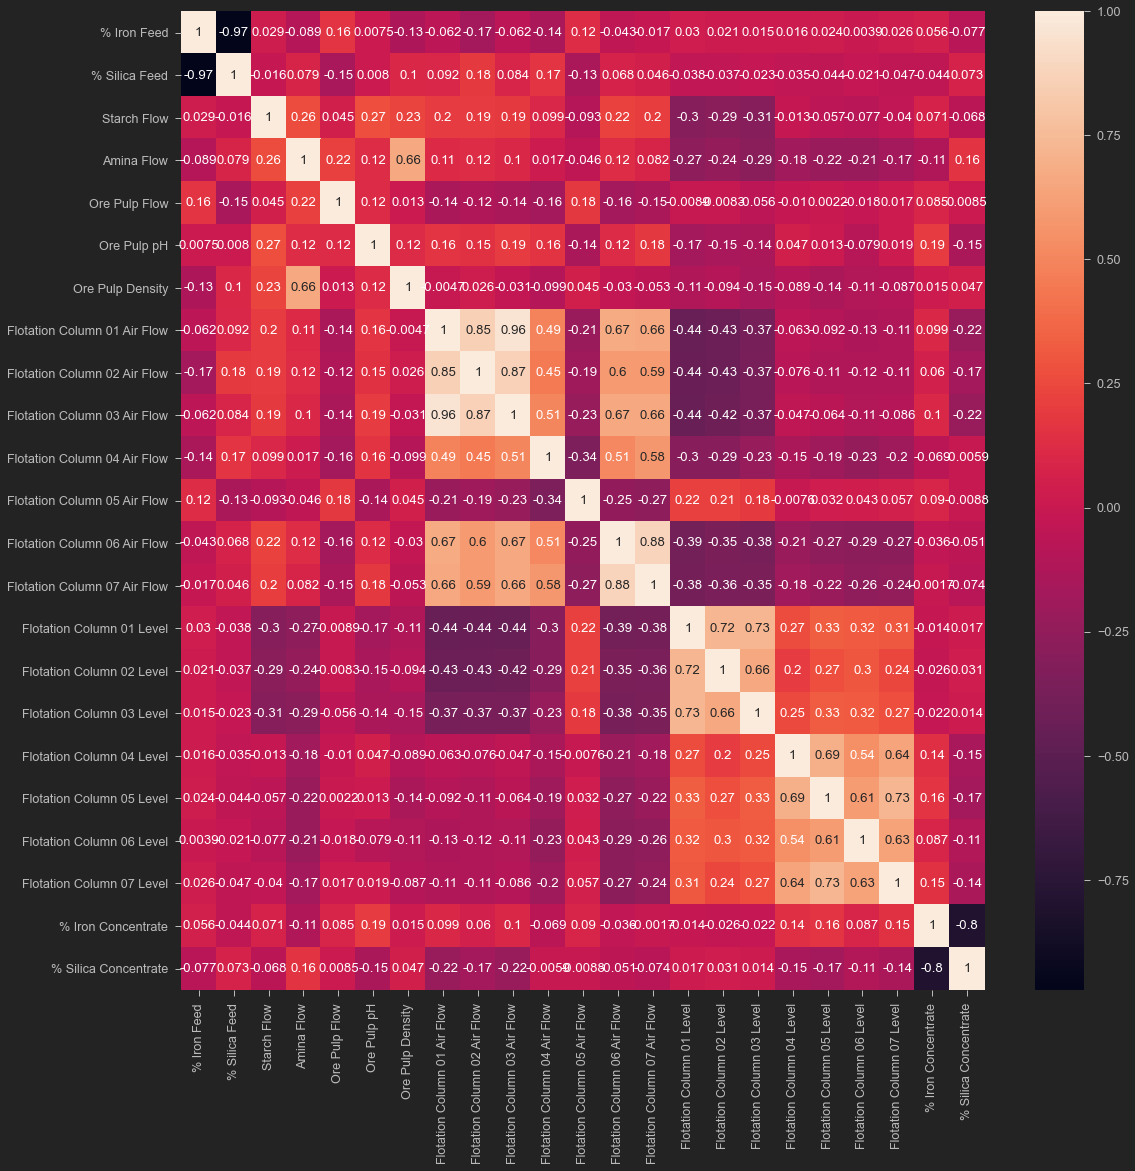

In [13]:
plt.figure(figsize = (18,18))
sns.heatmap(mining_df.corr(), annot = True)
# From this pair plot, we can infer that there is a relationship between iron feed and silica feed 
# Also, a relationship between silica concentrate and iron concentrate.

<AxesSubplot:xlabel='% Silica Concentrate', ylabel='% Iron Concentrate'>

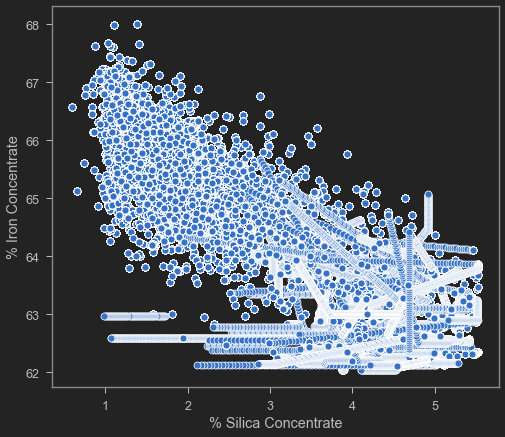

In [14]:
#Plot the scatterplot between % Silica Concentrate and Iron Concentrate and try to relate to the correlation matrix.
sns.scatterplot(mining_df['% Silica Concentrate'], mining_df['% Iron Concentrate'])

<AxesSubplot:xlabel='% Iron Feed', ylabel='% Silica Feed'>

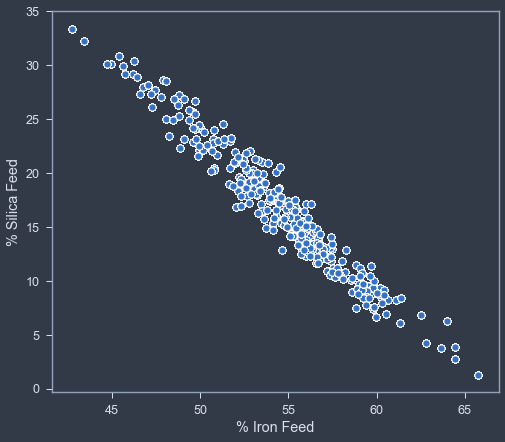

In [42]:
#Plot the scatterplot between % Iron Feed and % Silica Feed and try to relate to the correlation matrix.
sns.scatterplot(mining_df['% Iron Feed'], mining_df['% Silica Feed'])

# Data preparation

In [16]:
df_iron = mining_df.drop(columns = '% Silica Concentrate')
df_iron_target = mining_df['% Silica Concentrate']

In [17]:
df_iron.shape

(245700, 22)

In [18]:
df_iron_target.shape

(245700,)

In [19]:
df_iron = np.array(df_iron)
df_iron_target = np.array(df_iron_target)

In [20]:
# reshaping the array
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target.shape

(245700, 1)

In [21]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(df_iron)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(df_iron_target)

In [22]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
X_train.shape

(196560, 22)

In [24]:
X_test.shape

(49140, 22)

# Training a neural network on a regression task

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)
ANN_model = keras.Sequential()
ANN_model.add(Dense(250, input_dim = 22, kernel_initializer='normal',activation='relu'))
ANN_model.add(Dense(500,activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(500, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1, activation = 'linear'))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 250)               5750      
_________________________________________________________________
dense_8 (Dense)              (None, 500)               125500    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              501000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1000)             

In [31]:
history = ANN_model.fit (X_train, y_train, epochs = 5, validation_split =0.2)

Train on 157248 samples, validate on 39312 samples
Epoch 1/5
157248/157248 [==============================] - 364s 2ms/sample - loss: 0.2075 - val_loss: 0.1473
Epoch 2/5
157248/157248 [==============================] - 368s 2ms/sample - loss: 0.1455 - val_loss: 0.1231
Epoch 3/5
157248/157248 [==============================] - 371s 2ms/sample - loss: 0.1214 - val_loss: 0.1019
Epoch 4/5
157248/157248 [==============================] - 374s 2ms/sample - loss: 0.1055 - val_loss: 0.0986
Epoch 5/5
157248/157248 [==============================] - 392s 2ms/sample - loss: 0.0967 - val_loss: 0.0899


In [32]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

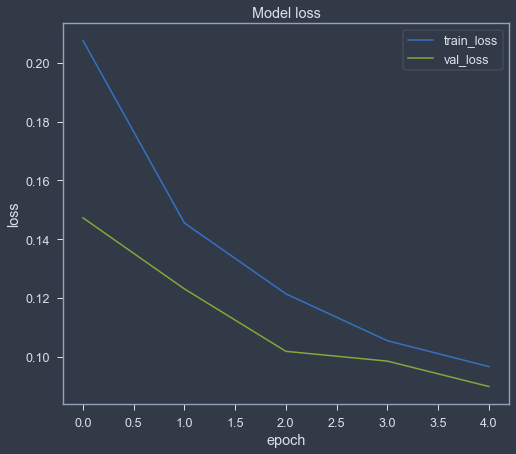

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# Training a decision tree (DT) and Random Forest(RF) models

In [26]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [27]:
accuracy_DT = DT_model.score(X_test, y_test)
accuracy_DT

0.98401452354924

In [28]:
# this runs longer. because a random forest model is an ensemble model consisting of many trees.
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators =70, max_depth =10)
RF_model.fit(X_train, y_train)

C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
accuracy_RF = RF_model.score(X_test, y_test)
accuracy_RF

0.8923923687059696